In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels

In [17]:
flights = pd.read_csv("/Users/administrador/Documents/Codeacademy/Airline Analysis/flight.csv")
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [18]:
flights.describe()

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


In [19]:
print(np.mean(flights.coach_price))
np.percentile(flights.coach_price, 50)

376.5852530821279


380.56

In [20]:
#task 2
print(np.mean(flights.coach_price[flights.hours == 8]))
print(np.min(flights.coach_price[flights.hours == 8]))
print(np.max(flights.coach_price[flights.hours == 8]))


431.8343773728164
170.77
593.635


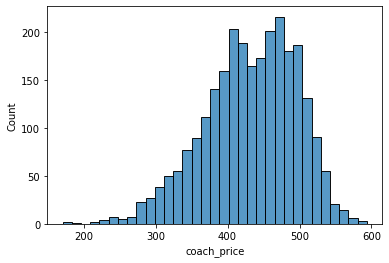

In [21]:
sns.histplot(flights.coach_price[flights.hours == 8])
plt.show()

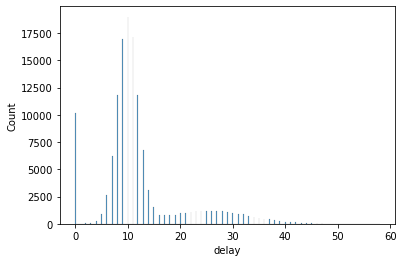

In [22]:
#task 3
plt.clf
sns.histplot(flights.delay[flights.delay < 500])

plt.show()

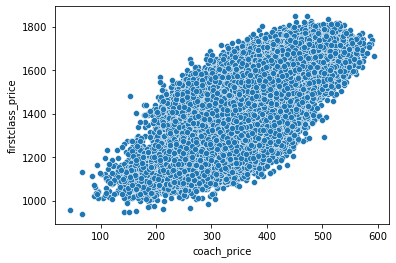

<Figure size 432x288 with 0 Axes>

In [23]:
#task 4
plt.clf()
sns.scatterplot(x = "coach_price", y="firstclass_price", data=flights)
plt.show()
plt.clf()

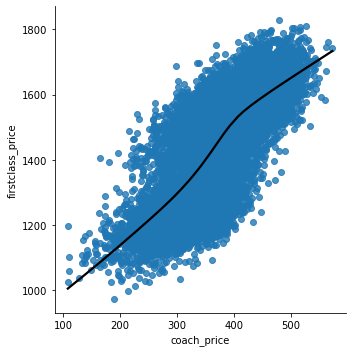

<Figure size 432x288 with 0 Axes>

In [25]:
#como tem muita coisa, vamos rodar um sample da base
perc = 0.1
flights_sub = flights.sample(n = int(flights.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flights_sub, line_kws={"color": "black"}, lowess=True)
plt.show()
plt.clf()

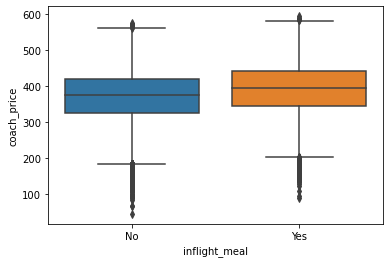

In [ ]:
#task 5
from matplotlib.pyplot import boxplot

plt.clf()

sns.boxplot(data=flights, x="inflight_meal", y="coach_price")

plt.show()



In [ ]:
print(flights.inflight_meal.head())

0     No
1     No
2     No
3     No
4    Yes
Name: inflight_meal, dtype: object


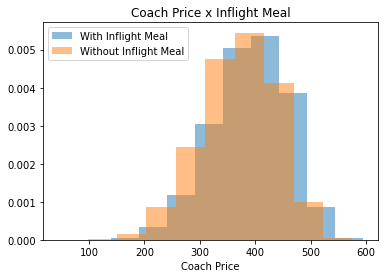

In [ ]:
plt.clf()
plt.hist(flights.coach_price[flights.inflight_meal == "Yes"], label="With Inflight Meal", density=True, alpha=0.5)
plt.hist(flights.coach_price[flights.inflight_meal == "No"], label="Without Inflight Meal", density=True, alpha=0.5)
plt.xlabel("Coach Price")
plt.title("Coach Price x Inflight Meal")
plt.legend()
plt.show()

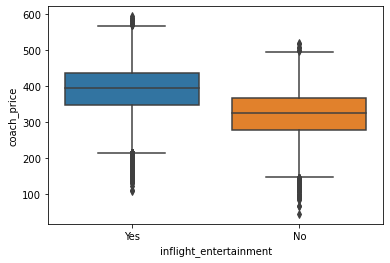

In [ ]:
plt.clf()
sns.boxplot(data=flights, x="inflight_entertainment", y="coach_price")
plt.show()


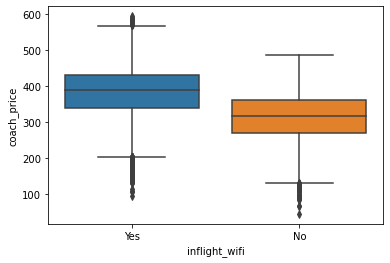

<Figure size 432x288 with 0 Axes>

In [26]:
plt.clf()
sns.boxplot(data=flights, x="inflight_wifi", y="coach_price")
plt.show()
plt.clf()

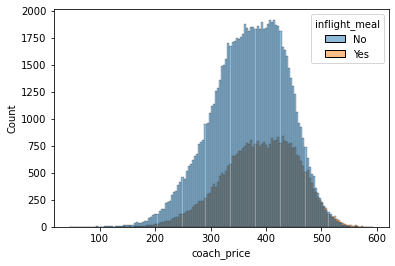

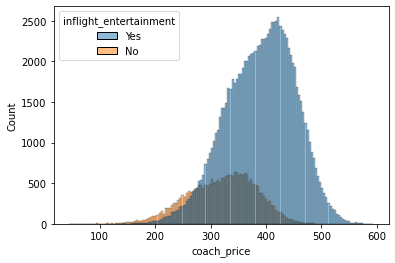

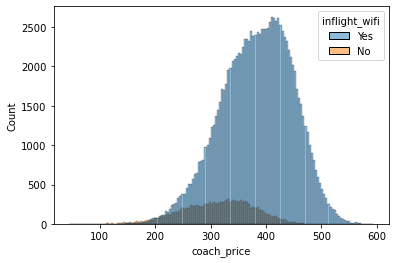

<Figure size 432x288 with 0 Axes>

In [28]:
#outra maneira de resolver isso
#criando histoplot
sns.histplot(data = flights, x="coach_price", hue="inflight_meal")
plt.show()
plt.clf()

sns.histplot(data = flights, x="coach_price", hue="inflight_entertainment")
plt.show()
plt.clf()

sns.histplot(data = flights, x="coach_price", hue="inflight_wifi")
plt.show()
plt.clf()
#  

<Figure size 432x288 with 0 Axes>

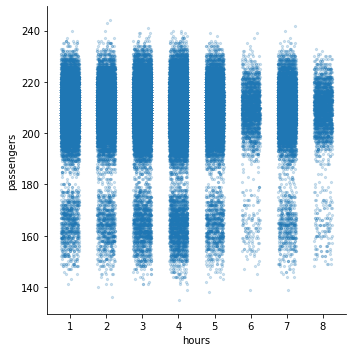

In [33]:
#Task 6
plt.clf()
sns.lmplot(x="hours", y="passengers", data=flights, scatter_kws={'s': 5, 'alpha': 0.2}, x_jitter=0.25, fit_reg = False)
plt.show()


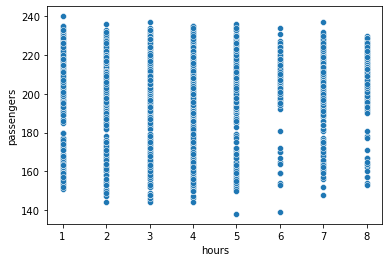

In [47]:
plt.clf()
sns.scatterplot(x = "hours", y = "passengers", data = flights_sub, x_jitter=0.2)
plt.show()

In [51]:
volume_passenger_maior = flights_sub.passengers >= 180
volume_passenger_menor = flights_sub.passengers < 180

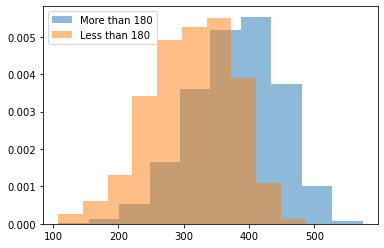

In [54]:
plt.clf()
plt.hist(flights_sub.coach_price[flights_sub.passengers >= 180], label="More than 180", density=True, alpha=0.5)
plt.hist(flights_sub.coach_price[flights_sub.passengers < 180], label="Less than 180", density=True, alpha=0.5)
plt.legend()
plt.show()

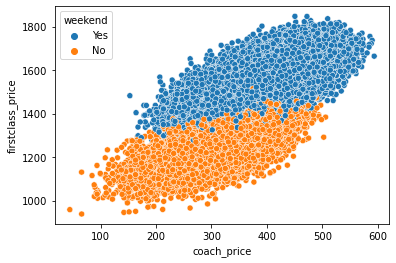

In [41]:
#Task 7
plt.clf()
sns.scatterplot(x = "coach_price", y="firstclass_price", hue="weekend", data=flights)
plt.show()

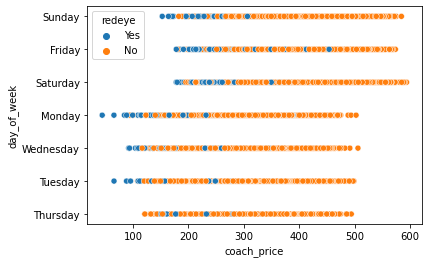

In [ ]:
#Task 8
plt.clf()
sns.scatterplot(x = "coach_price", y="day_of_week", hue="redeye", data=flights)
plt.show()

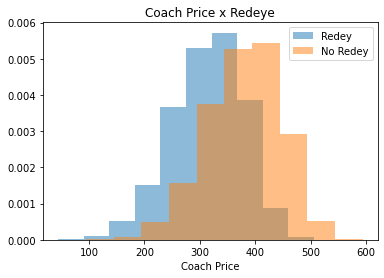

In [ ]:
plt.clf()
plt.hist(flights.coach_price[flights.redeye == "Yes"], label="Redey", density=True, alpha=0.5)
plt.hist(flights.coach_price[flights.redeye == "No"], label="No Redey", density=True, alpha=0.5)
plt.xlabel("Coach Price")
plt.title("Coach Price x Redeye")
plt.legend()
plt.show()

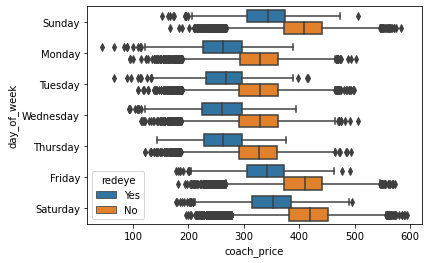

In [ ]:
plt.clf()
days_list = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.boxplot(data = flights, x="coach_price", y="day_of_week", hue="redeye", order=days_list)
plt.show()